In [1]:
import numpy as np
import sympy as sp
import math 
import matplotlib
import matplotlib.cm as cm
import matplotlib.pyplot as plt

In [2]:
def gradian_matrix(F,X):
    A=[]
    for x in X:
        A.append(sp.diff(F(X[0],X[1]),x))
    A=np.array(A)
    return A

In [3]:
def Hessian_matrix(G,X):
    A=[]
    for g in G:
        B=[]
        for x in X:
            B.append(sp.diff(g,x)) 
        A.append(B)
    A=np.array(A)
    return A

In [4]:
def learning_rate(g,A):
    p=-1*g
    a=np.dot(np.transpose(g),p)
    b=np.dot(np.transpose(p),A)
    c=np.dot(b,p)
    if c==0:
        return 0
    else:
        return -(a/c)

In [5]:
def steepest_Descent(F,X,x,iter,accuracy):
    iteration=0
    error=[1,1]
    while(True):
        g=gradian_matrix(F,X)
        A=Hessian_matrix(g,X)
        for row in range(A.shape[0]):
             for col in range(A.shape[1]) :
                A[row,col]=A[row,col].evalf(subs={x1:x[0], x2:x[1]})
        for i in range(len(g)):
            g[i]=g[i].evalf(subs={x1:x[0], x2:x[1]})
            
        alfa=learning_rate(g,A)
        xx=x-alfa*g
        for i in range(len(x)):
            error[i]=abs(x[i]-xx[i])
            
        if error[0]>accuracy and error[1]>accuracy:
            x=xx
        else:
            print(f'''Optimal point is {xx}.
learning rate in the last iteration is {alfa}
The number of iteration is {iteration} ''')
            break
        if iteration==iter and error[0]>accuracy and error[1]>accuracy:
            print(f'''steepest_Descent's algorithm faild 😢!!
learning rate in the last iteration is {alfa}
The number of iteration is {iteration}''')
            break
        iteration+=1

In [6]:
def F(x1,x2):
    return (x1+x2)**4-12*x1*x2+x1+x2+1

In [7]:
x1=sp.Symbol('x1')
x2=sp.Symbol('x2')
X=[x1,x2]

In [8]:
x=[-1,-7]
steepest_Descent(F,X,x,100,0.01)

Optimal point is [-0.651172311413301 -0.645263938238729].
learning rate in the last iteration is 0.0626568704831387
The number of iteration is 8 


In [9]:
x=[100,70]
steepest_Descent(F,X,x,100,0.01)

Optimal point is [0.565506689045490 0.565452643712986].
learning rate in the last iteration is 0.0525162575081811
The number of iteration is 16 


In [10]:
x=[-2,-1]
steepest_Descent(F,X,x,100,0.01)

Optimal point is [-0.650182591009065 -0.648119503665440].
learning rate in the last iteration is 0.0728725599163583
The number of iteration is 5 


In [11]:
def Newton(F,X,x,iter,accuracy):
    error=[1,1]
    iteration=0
    while error[0]>accuracy and error[1]>accuracy :
        g=gradian_matrix(F,X)
        A=Hessian_matrix(g,X)
        for row in range(A.shape[0]):
            for col in range(A.shape[1]) :
                A[row,col]=A[row,col].evalf(subs={x1:x[0], x2:x[1]})
    
        for i in range(len(g)):
            g[i]=g[i].evalf(subs={x1:x[0], x2:x[1]})
            
        A=A.astype(float)       
        A_invers=np.linalg.inv(A)
        xx=x-np.dot(A_invers,g)
        
        for i in range(len(x)):
            error[i]=abs(x[i]-xx[i])
        if error[0]>accuracy and error[1]>accuracy:
            x=xx
        else:
            print(f'''Optimal point is {xx}.
The number of iteration is {iteration} 
error in last iteration{error}''')
            break

        if iteration==iter and error[0]>accuracy and error[1]>accuracy:
            print(f'''Newton's algorithm faild 😢!!
The number of iteration is {iteration} ''')
            break
        iteration+=1   
    return 

In [12]:
x=[-1,-7]
Newton(F,X,x,100,0.01)

Optimal point is [-0.650420004943229 -0.650420004943229].
The number of iteration is 7 
error in last iteration[0.000318877076180502, 0.000318877076180502]


In [13]:
x=[100,70]
Newton(F,X,x,100,0.01)

Optimal point is [0.565451035167735 0.565451035167735].
The number of iteration is 15 
error in last iteration[0.000403870741469858, 0.000403870741469858]


In [14]:
x=[-2,-1]
Newton(F,X,x,100,0.01)

Optimal point is [-0.650432701194027 -0.650432701194027].
The number of iteration is 4 
error in last iteration[0.00243000817633565, 0.00243000817633565]


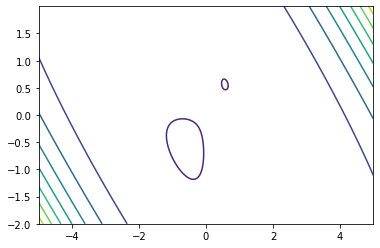

In [15]:
delta=0.001
x=np.arange(-5.0,5.0,delta)
y=np.arange(-2.0,2.0,delta)
X,Y=np.meshgrid(x,y)
z=(X+Y)**4-12*X*Y+X+Y+1
fig,ax=plt.subplots()
CS=ax.contour(X,Y,z)


در هر دو روش به نزدیک ترین نقطه بهینه همگرا می شویم اما در روش نیوتن این همگرایی سریع تر رخ می دهد.